<center><h1>Chen_Shufen_HW6</h1></center>

Name: Shufen Chen
<br>
Github Username: shufench-usc
<br>
USC ID: 9180940635

## 1. Tree-Based Methods

Import packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, auc, roc_curve, RocCurveDisplay, accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

### (a) Download the APS Failure data

In [185]:
# Download the APS Failure Data and load it into pandas DataFrames
train_df = pd.read_csv('../data/aps_failure_training_set.csv', skiprows=20, na_values=['na'])
test_df = pd.read_csv('../data/aps_failure_test_set.csv', skiprows=20, na_values=['na'])

display(train_df)
display(test_df)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,NaN,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636,NaN,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110,NaN,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


### (b) Data Preparation

#### (i) Research what types of techniques are usually used

1. Mean, median, or mode imputation
<br>Replaces missing values with the mean(for normally distributed data), median(for skewed data), or mode(for categorical variables)
2. K-Nearest Neighbors(KNN) imputation
<br>predicts missing valurs based on the k most similar observations in the dataset
3. Regression imputation
<br>uses regression models to estimate missing values
4. Multiple imputation by chained equations(MICE)
<br>creates multiple datasets with different imputed values and combines the results.

In [5]:
# Count missing values in 'class' column(string type)
tr_na = train_df['class'].isna().sum()  
te_na = test_df['class'].isna().sum()  
print(tr_na, te_na)

# Impute missing values with mean of the column, except for 'class' column
for i in train_df.columns:
    if i == 'class':
        continue
    mean_val = train_df[i].mean()
    train_df[i] = train_df[i].fillna(mean_val)
    test_df[i] = test_df[i].fillna(mean_val)

display(train_df)
display(test_df)

0 0


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,0.713189,6.640000e+02,186.000000,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,0.713189,2.130707e+09,224.000000,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,0.000000,2.130706e+09,18.000000,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,0.713189,2.130706e+09,494.000000,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.000000,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.000000,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.000000,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,0.713189,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,0.713189,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,0.713189,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18,0.000000,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636,0.713189,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110,0.713189,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


#### (ii) Calculate the coefficient of variation

In [6]:
# Combine the training and test sets
comb_df = pd.concat([train_df, test_df], axis=0)

# Calculate the correlation variation
comb_stats = comb_df.describe()
comb_cv = comb_stats.loc["std"] / comb_stats.loc["mean"]

# Convert the correlation variation to a dataframe
cv_df = pd.DataFrame(comb_cv, columns=["CV"])
print(cv_df)

                CV
aa_000    4.328608
ab_000    2.207351
ac_000    2.167798
ad_000  193.955307
ae_000   22.282263
...            ...
ee_007    4.885304
ee_008    3.335353
ee_009    5.754213
ef_000   47.781107
eg_000   45.711130

[170 rows x 1 columns]


#### (iii) Plot a correlation matrix

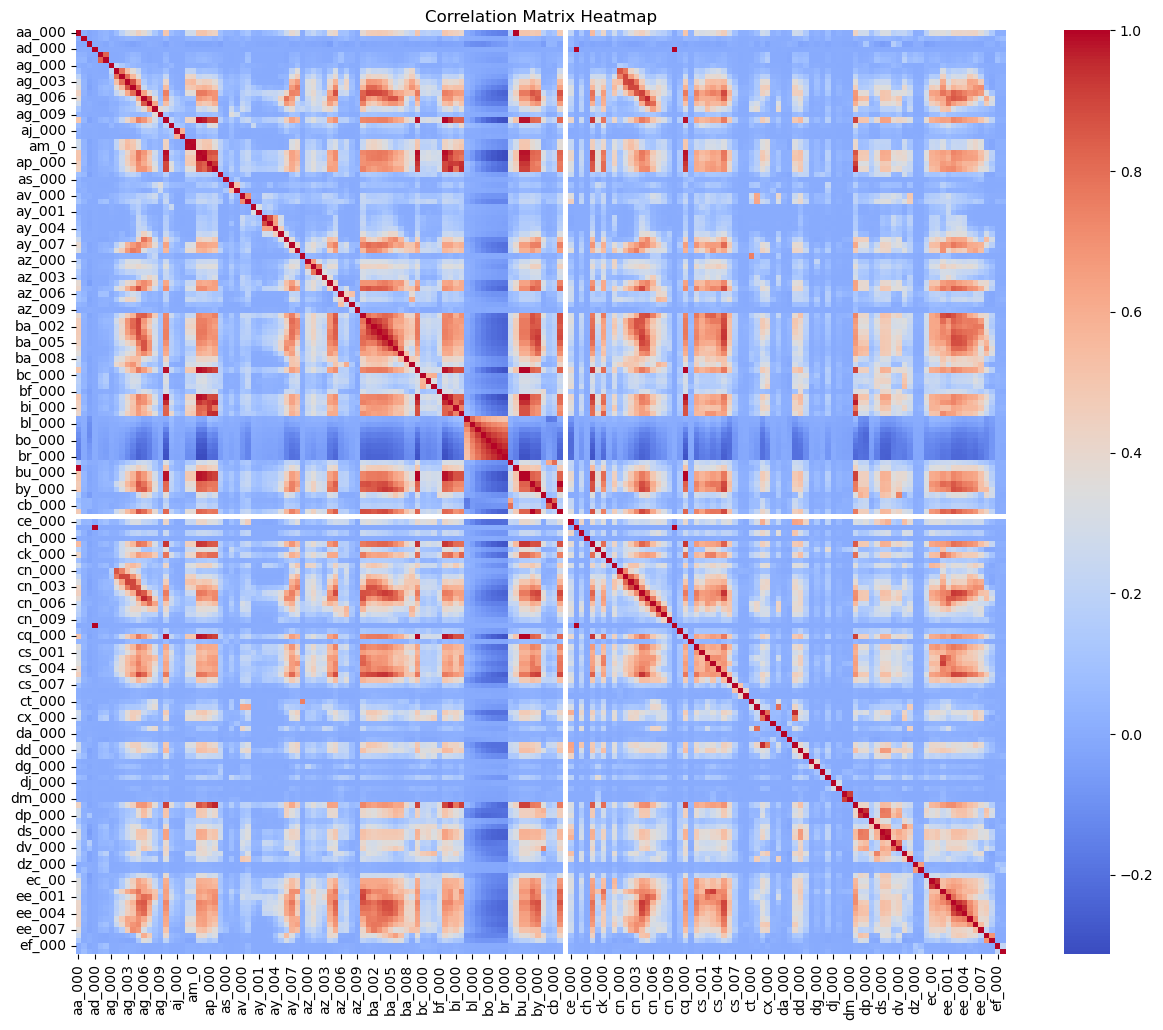

In [7]:
# Calculate the correlation matrix
correlation_matrix = comb_df.iloc[:,1:].corr()

# Create a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

#### (iv) Make scatter plots and box plots

In [8]:
# Get the top sqrt(170) features with highest coefficient of variation
row_num = int(np.sqrt(170))
rows = cv_df.sort_values(by="CV", ascending=False).head(row_num)
print(rows)

# Get the rresponding column names
index_ls = rows.index.tolist()

                CV
cf_000  194.438323
co_000  194.089168
ad_000  193.955307
cs_009  193.045035
dj_000  120.084900
df_000  116.138172
as_000  114.464381
dh_000  111.946396
ag_000   91.351287
au_000   86.293581
ak_000   78.559993
az_009   77.894525
ay_009   77.457761


In [19]:
# check data types
comb_df[index_ls].dtypes

# combine features with class column for plotting
plot_df = pd.concat([comb_df[index_ls], comb_df['class']], axis=1)

# convert class to numeric
plot_df['class'] = plot_df['class'].replace({'neg': 0, 'pos': 1}) 

print(plot_df)

              cf_000         co_000         ad_000  cs_009  dj_000  df_000  \
0           2.000000     220.000000     280.000000     0.0     0.0     0.0   
1      190221.810984  190515.566938  190620.639314     0.0     0.0     0.0   
2           0.000000       0.000000     100.000000     0.0     0.0     0.0   
3           2.000000       2.000000      66.000000     0.0     0.0     0.0   
4           0.000000     202.000000     458.000000     0.0     0.0     0.0   
...              ...            ...            ...     ...     ...     ...   
15995       2.000000      42.000000     892.000000     0.0     0.0     0.0   
15996       2.000000       0.000000      46.000000     0.0     0.0     0.0   
15997       2.000000     378.000000    1518.000000     0.0     0.0     0.0   
15998       0.000000       0.000000      32.000000     0.0     0.0     0.0   
15999       0.000000       0.000000       4.000000     0.0     0.0     0.0   

       as_000  dh_000  ag_000  au_000  ak_000  az_009  ay_009  

/var/folders/n2/qm35mwj17rxdqgtkgj7wbqmr0000gn/T/ipykernel_6740/3426526796.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  plot_df['class'] = plot_df['class'].replace({'neg': 0, 'pos': 1})


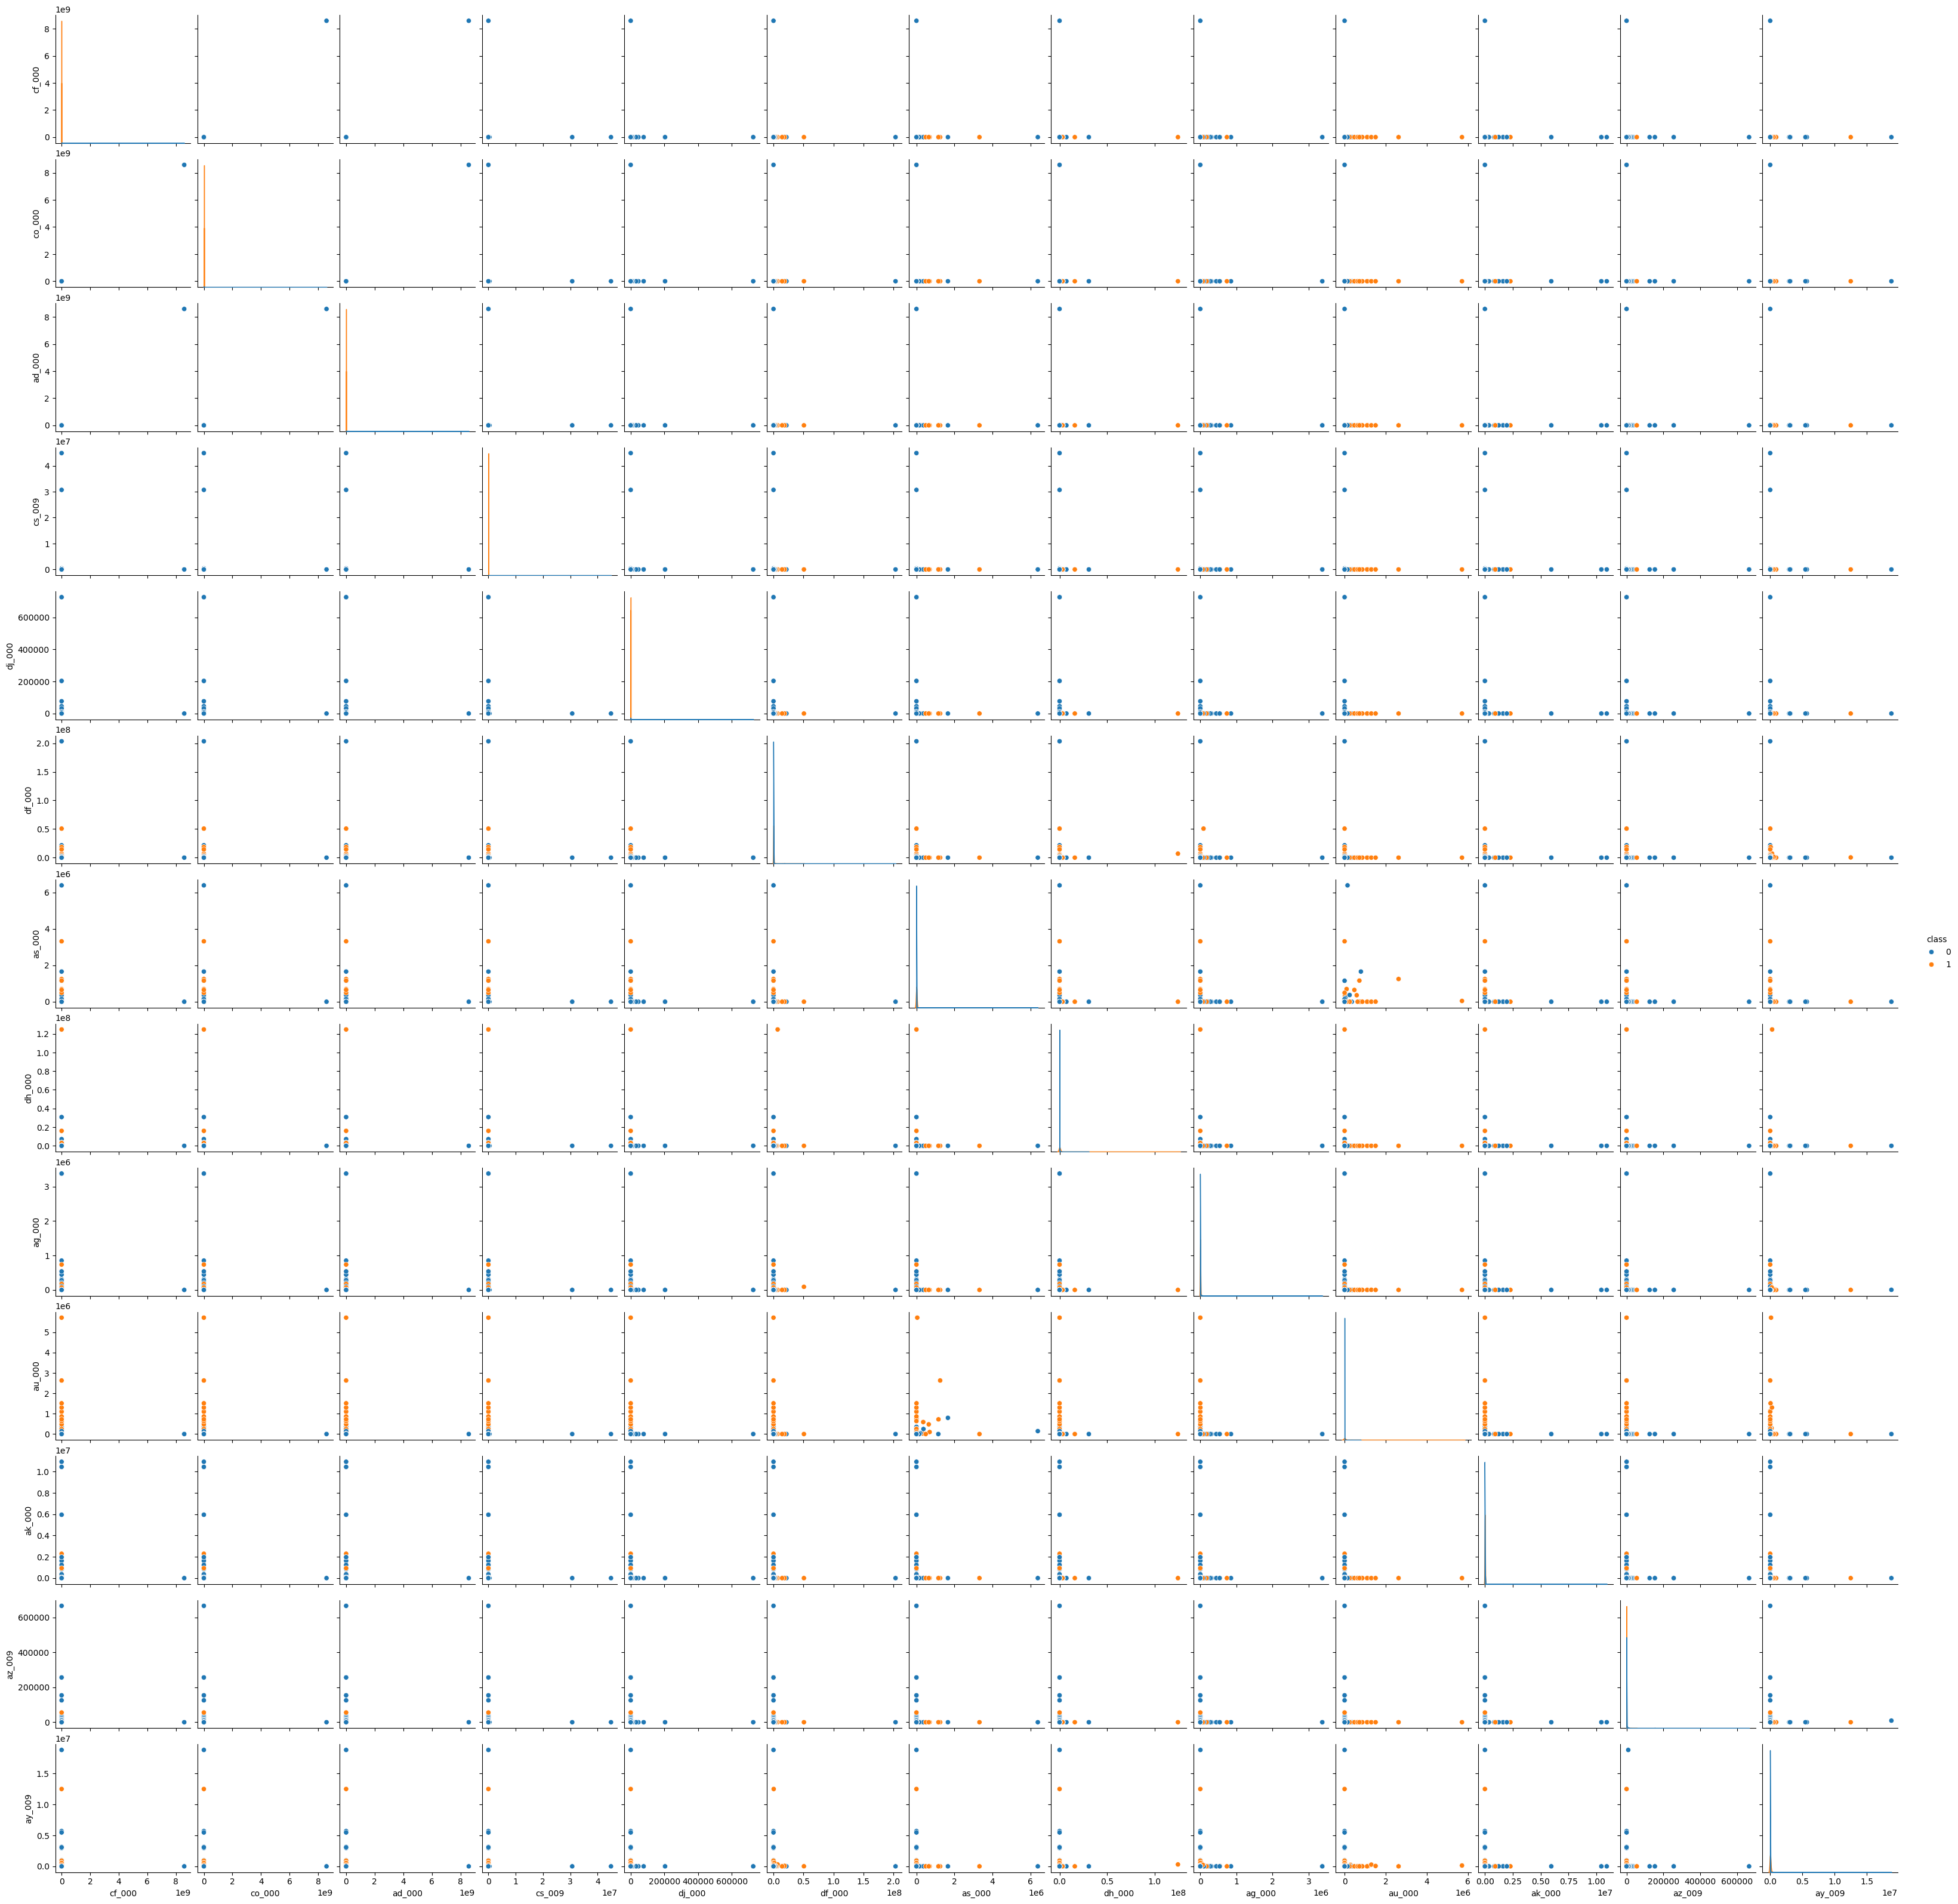

In [15]:
# scatter plot
sns.pairplot(data=plot_df, hue="class")
plt.show()

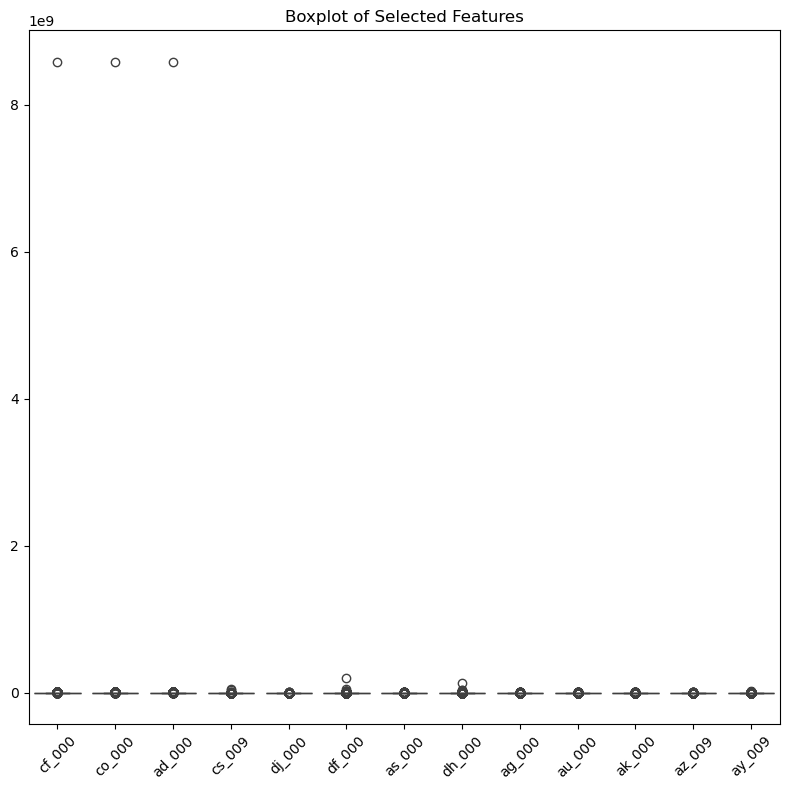

In [27]:
# boxplot
plt.figure(figsize=(8, 8))
sns.boxplot(data=comb_df[index_ls])
plt.xticks(rotation=45)
plt.title('Boxplot of Selected Features')
plt.tight_layout()
plt.show()

#### (v) Is this data set imbalanced?

In [21]:
comb_df.groupby('class').size()

class
neg    74625
pos     1375
dtype: int64

The number of positive data is 1375, and the number of negative data is 74625. The data is unbalanced.

### (c) Train a random forest

In [68]:
# Split the training and test sets
X_train = train_df.drop(columns=['class'])
y_train = train_df['class']

X_test = test_df.drop(columns=['class'])
y_test = test_df['class']


# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=200, oob_score=True)
rf_clf.fit(X_train, y_train)

# Evaluate the model
y_tr_pred = rf_clf.predict(X_train)
y_te_pred = rf_clf.predict(X_test)

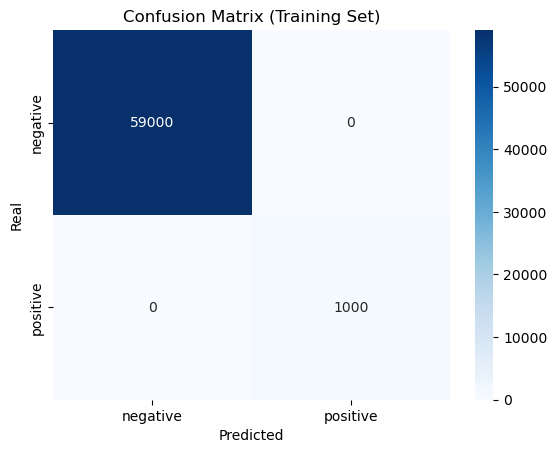

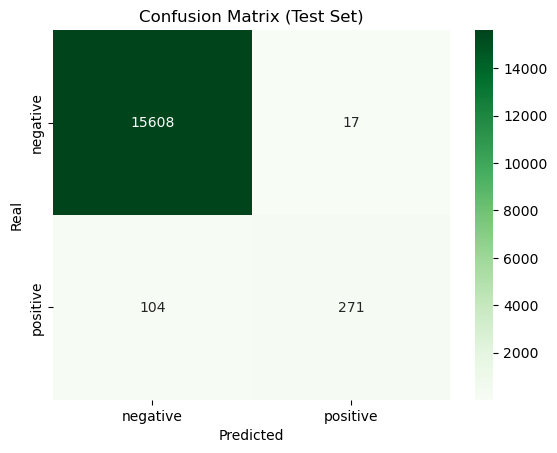

In [69]:
# Confusion Matrix for training set
cm_tr = confusion_matrix(y_train, y_tr_pred, labels=['neg', 'pos'])
sns.heatmap(cm_tr, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.title('Confusion Matrix (Training Set)')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

# Confusion Matrix for test set 
cm_te = confusion_matrix(y_test, y_te_pred, labels=['neg', 'pos'])
sns.heatmap(cm_te, annot=True, fmt='d', cmap='Greens', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

/var/folders/n2/qm35mwj17rxdqgtkgj7wbqmr0000gn/T/ipykernel_6740/2742175132.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fpr_tr, tpr_tr, _ = roc_curve(y_train.replace({'neg': 0, 'pos': 1}), y_tr_prob)
/Users/hunnechen/anaconda3/envs/workspace/lib/python3.10/site-packages/sklearn/utils/_plotting.py:379: FutureWarning: `estimator_name` is deprecated in 1.7 and will be removed in 1.9. Use `name` instead.
  warnings.warn(


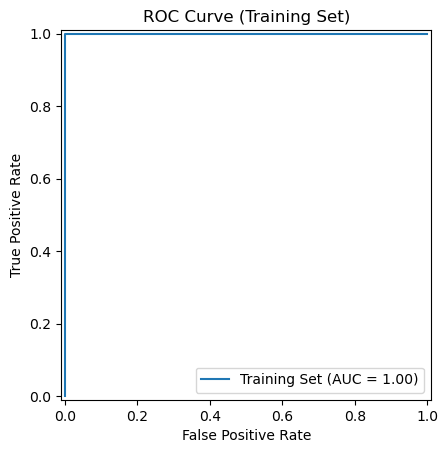

/var/folders/n2/qm35mwj17rxdqgtkgj7wbqmr0000gn/T/ipykernel_6740/2742175132.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fpr_te, tpr_te, _ = roc_curve(y_test.replace({'neg': 0, 'pos': 1}), y_te_prob)
/Users/hunnechen/anaconda3/envs/workspace/lib/python3.10/site-packages/sklearn/utils/_plotting.py:379: FutureWarning: `estimator_name` is deprecated in 1.7 and will be removed in 1.9. Use `name` instead.
  warnings.warn(


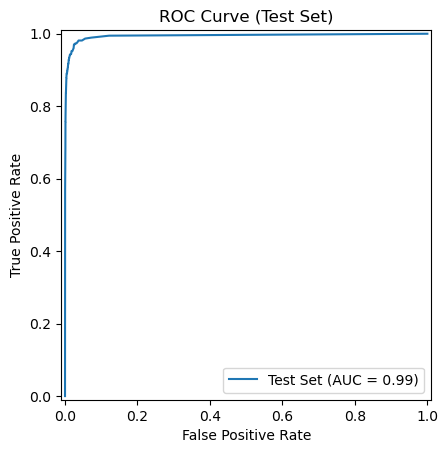

In [70]:
# ROC AUC for training set
y_tr_prob = rf_clf.predict_proba(X_train)[:, 1]
fpr_tr, tpr_tr, _ = roc_curve(y_train.replace({'neg': 0, 'pos': 1}), y_tr_prob)
roc_auc_tr = auc(fpr_tr, tpr_tr)
display_tr = RocCurveDisplay(fpr=fpr_tr, tpr=tpr_tr, roc_auc=roc_auc_tr, estimator_name='Training Set')
display_tr.plot()
plt.title('ROC Curve (Training Set)')
plt.show()

# ROC AUC for testing set
y_te_prob = rf_clf.predict_proba(X_test)[:, 1]              
fpr_te, tpr_te, _ = roc_curve(y_test.replace({'neg': 0, 'pos': 1}), y_te_prob)
roc_auc_te = auc(fpr_te, tpr_te)
display_te = RocCurveDisplay(fpr=fpr_te, tpr=tpr_te, roc_auc=roc_auc_te, estimator_name='Test Set')
display_te.plot()
plt.title('ROC Curve (Test Set)')
plt.show()

In [71]:
# misclassification for training set
mis_tr = 1 - accuracy_score(y_train, y_tr_pred)
print(f"Misclassification Rate for Training Set: {mis_tr}")

# misclassification for test set
mis_te = 1 - accuracy_score(y_test, y_te_pred)
print(f"Misclassification Rate for Test Set: {mis_te}")

Misclassification Rate for Training Set: 0.0
Misclassification Rate for Test Set: 0.0075625000000000275


In [72]:
# Out of bag error
oob_error = 1 - rf_clf.oob_score_
print(f'Out of Bag Error: {oob_error}')

# test error
test_error = 1 - rf_clf.score(X_test, y_test)
print(f'Test Set Error: {test_error}')

Out of Bag Error: 0.005916666666666681
Test Set Error: 0.0075625000000000275


Compared with the test error, the Out of Bag error is smaller.

### (d) Research class imbalance in random forest

<br>How class imbalance is addressed in Random Forest?

1. Balanced Random Forest (BRF)
<br> The BRF addresses the imblance problem in random forest by iteratively drawing a bootstrap sample with equal proportions of data points from both the minority and the majority class.
2. SMOTE + Standard Random Forest
<br> Synthetic Minority Over-sampling Technique (SMOTE) generates synthetic samples for the minority class to balance the dataset before training a standard random forest model.
3. Weighted Random Forest (WRF)
<br> Following the cost sensitive approach, WRF assigns different weights to different classes during the training process to handle the class imbalance problem.

In [73]:
# Compensate for class imblance by using weighted random forest classifier

rf_clf_w = RandomForestClassifier(n_estimators=200, oob_score=True, class_weight='balanced')
rf_clf_w.fit(X_train, y_train)

# Evaluate the model
y_tr_pred = rf_clf_w.predict(X_train)
y_te_pred = rf_clf_w.predict(X_test)

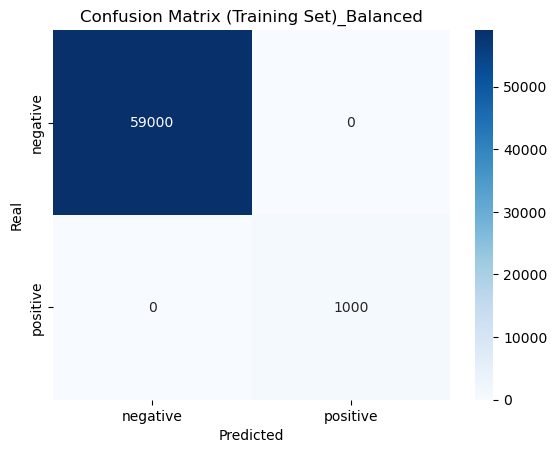

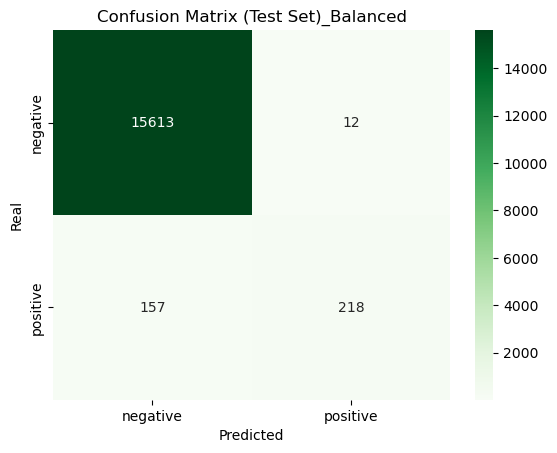

In [74]:
# Confusion Matrix for training set
cm_tr = confusion_matrix(y_train, y_tr_pred, labels=['neg', 'pos'])
sns.heatmap(cm_tr, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.title('Confusion Matrix (Training Set)_Balanced')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

# Confusion Matrix for test set 
cm_te = confusion_matrix(y_test, y_te_pred, labels=['neg', 'pos'])
sns.heatmap(cm_te, annot=True, fmt='d', cmap='Greens', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.title('Confusion Matrix (Test Set)_Balanced')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

/var/folders/n2/qm35mwj17rxdqgtkgj7wbqmr0000gn/T/ipykernel_6740/3838079633.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fpr_tr, tpr_tr, _ = roc_curve(y_train.replace({'neg': 0, 'pos': 1}), y_tr_prob)
/Users/hunnechen/anaconda3/envs/workspace/lib/python3.10/site-packages/sklearn/utils/_plotting.py:379: FutureWarning: `estimator_name` is deprecated in 1.7 and will be removed in 1.9. Use `name` instead.
  warnings.warn(


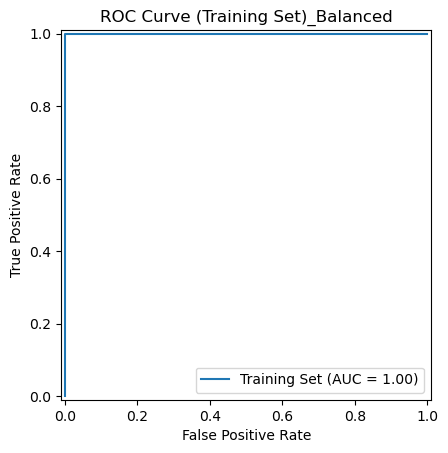

/var/folders/n2/qm35mwj17rxdqgtkgj7wbqmr0000gn/T/ipykernel_6740/3838079633.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fpr_te, tpr_te, _ = roc_curve(y_test.replace({'neg': 0, 'pos': 1}), y_te_prob)
/Users/hunnechen/anaconda3/envs/workspace/lib/python3.10/site-packages/sklearn/utils/_plotting.py:379: FutureWarning: `estimator_name` is deprecated in 1.7 and will be removed in 1.9. Use `name` instead.
  warnings.warn(


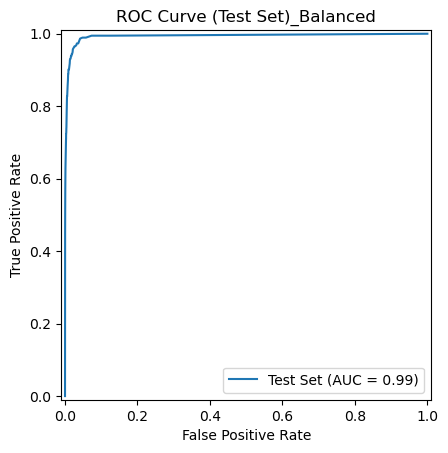

In [75]:
# ROC AUC for training set
y_tr_prob = rf_clf_w.predict_proba(X_train)[:, 1]
fpr_tr, tpr_tr, _ = roc_curve(y_train.replace({'neg': 0, 'pos': 1}), y_tr_prob)
roc_auc_tr = auc(fpr_tr, tpr_tr)
display_tr = RocCurveDisplay(fpr=fpr_tr, tpr=tpr_tr, roc_auc=roc_auc_tr, estimator_name='Training Set')
display_tr.plot()
plt.title('ROC Curve (Training Set)_Balanced')
plt.show()

# ROC AUC for testing set
y_te_prob = rf_clf_w.predict_proba(X_test)[:, 1]              
fpr_te, tpr_te, _ = roc_curve(y_test.replace({'neg': 0, 'pos': 1}), y_te_prob)
roc_auc_te = auc(fpr_te, tpr_te)
display_te = RocCurveDisplay(fpr=fpr_te, tpr=tpr_te, roc_auc=roc_auc_te, estimator_name='Test Set')
display_te.plot()
plt.title('ROC Curve (Test Set)_Balanced')
plt.show()

In [76]:
# misclassification for training set
mis_tr = 1 - accuracy_score(y_train, y_tr_pred)
print(f"Misclassification Rate for Training Set: {mis_tr}")

# misclassification for test set
mis_te = 1 - accuracy_score(y_test, y_te_pred)
print(f"Misclassification Rate for Test Set: {mis_te}")

Misclassification Rate for Training Set: 0.0
Misclassification Rate for Test Set: 0.01056250000000003


In [77]:
# Out of bag error
oob_error = 1 - rf_clf_w.oob_score_
print(f'Out of Bag Error: {oob_error}')

# test error
test_error = 1 - rf_clf_w.score(X_test, y_test)
print(f'Test Set Error: {test_error}')

Out of Bag Error: 0.007633333333333381
Test Set Error: 0.01056250000000003


Compared with the test error, the Out of Bag error is smaller.

From the results we got, we can see than the weighted random forest model has the higher test error, out of bag error, and misclassification rate for test set. Therefore, the random forest without compensating for class imbalance performs better.

### (e) XGBoost and Model Trees

In [100]:
# Convert class labels to numeric for XGBoost
y_train = y_train.replace({"neg": 0, "pos": 1})
y_test = y_test.replace({"neg": 0, "pos": 1})


# Train an XGBoost Classifier
alphas = np.logspace(-4, -1, 10)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []
for alpha in alphas:
    xgb_clf = XGBClassifier(objective='binary:logistic', reg_alpha=alpha)
    scores = cross_val_score(xgb_clf, X_train, y_train, cv=cv, scoring="accuracy")
    
    results.append({'alpha': alpha, 'accuracy': np.mean(scores)})

results_df = pd.DataFrame(results)
display(results_df)


,alpha,accuracy
0,0.000100,0.994133
1,0.000215,0.994100
2,0.000464,0.993983
3,0.001000,0.994067
4,0.002154,0.993983
5,0.004642,0.994000
6,0.010000,0.994000
7,0.021544,0.993933
8,0.046416,0.993850
9,0.100000,0.993767


In [118]:
# fit the model with best alpha
best_alpha = results_df.loc[results_df['accuracy'].idxmax(), 'alpha']
xgb_clf = XGBClassifier(objective='binary:logistic', reg_alpha=alpha)
xgb_clf.fit(X_train, y_train)
y_tr_pred = xgb_clf.predict(X_train)
y_te_pred = xgb_clf.predict(X_test)


In [119]:
# train error
train_error = 1 - xgb_clf.score(X_train, y_train)
print(f'Test Error: {train_error}')

# test error 
test_error = 1 - xgb_clf.score(X_test, y_test)
print(f'Test Error: {test_error}')

Test Error: 1.666666666666483e-05
Test Error: 0.006687499999999957


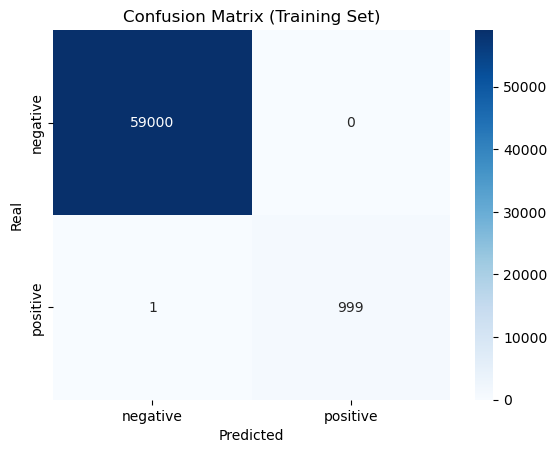

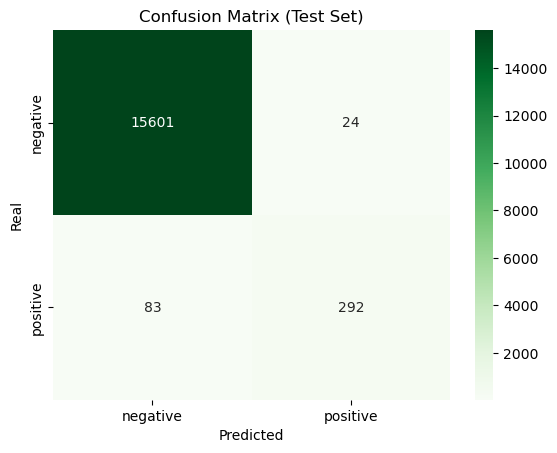

In [120]:
# Confusion Matrix for training set 
cm_tr = confusion_matrix(y_train, y_tr_pred)
sns.heatmap(cm_tr, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.title('Confusion Matrix (Training Set)')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

# Confusion Matrix for test set 
cm_te = confusion_matrix(y_test, y_te_pred)
sns.heatmap(cm_te, annot=True, fmt='d', cmap='Greens', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

/Users/hunnechen/anaconda3/envs/workspace/lib/python3.10/site-packages/sklearn/utils/_plotting.py:379: FutureWarning: `estimator_name` is deprecated in 1.7 and will be removed in 1.9. Use `name` instead.
  warnings.warn(


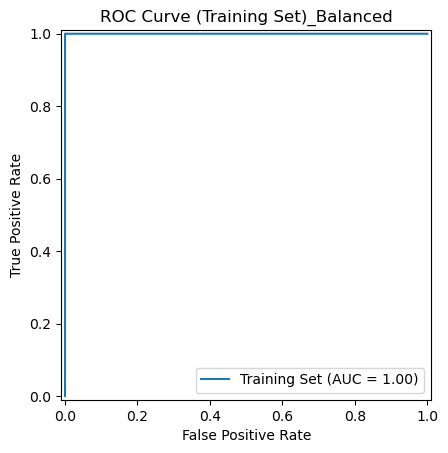

/Users/hunnechen/anaconda3/envs/workspace/lib/python3.10/site-packages/sklearn/utils/_plotting.py:379: FutureWarning: `estimator_name` is deprecated in 1.7 and will be removed in 1.9. Use `name` instead.
  warnings.warn(


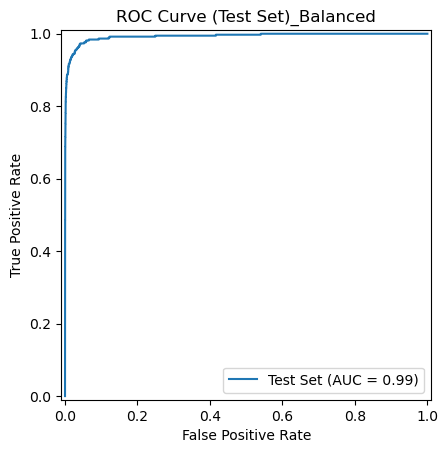

In [121]:
# ROC AUC for training set
y_tr_prob = xgb_clf.predict_proba(X_train)[:, 1]
fpr_tr, tpr_tr, _ = roc_curve(y_train.replace({'neg': 0, 'pos': 1}), y_tr_prob)
roc_auc_tr = auc(fpr_tr, tpr_tr)
display_tr = RocCurveDisplay(fpr=fpr_tr, tpr=tpr_tr, roc_auc=roc_auc_tr, estimator_name='Training Set')
display_tr.plot()
plt.title('ROC Curve (Training Set)_Balanced')
plt.show()

# ROC AUC for testing set
y_te_prob = xgb_clf.predict_proba(X_test)[:, 1]              
fpr_te, tpr_te, _ = roc_curve(y_test.replace({'neg': 0, 'pos': 1}), y_te_prob)
roc_auc_te = auc(fpr_te, tpr_te)
display_te = RocCurveDisplay(fpr=fpr_te, tpr=tpr_te, roc_auc=roc_auc_te, estimator_name='Test Set')
display_te.plot()
plt.title('ROC Curve (Test Set)_Balanced')
plt.show()

### (f) Use SMOTE to pre-process your data

In [122]:
alphas = np.logspace(-4, -1, 10)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []
for alpha in alphas:
    pipe = Pipeline(steps=[
        ("smote", SMOTE(random_state=42)),
        ("xgb", XGBClassifier(objective='binary:logistic',reg_alpha=alpha))])
    scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring="accuracy")
    results.append({'alpha': alpha, 'accuracy': np.mean(scores)})

results_df = pd.DataFrame(results)
display(results_df)


,alpha,accuracy
0,0.000100,0.993933
1,0.000215,0.993917
2,0.000464,0.993900
3,0.001000,0.993850
4,0.002154,0.993733
5,0.004642,0.993717
6,0.010000,0.993650
7,0.021544,0.993850
8,0.046416,0.993650
9,0.100000,0.993583


In [123]:
# fit the model with best alpha
best_alpha = results_df.loc[results_df['accuracy'].idxmax(), 'alpha']
pipe = Pipeline(steps=[
    ("smote", SMOTE(random_state=42)),
    ("xgb", XGBClassifier(objective='binary:logistic',reg_alpha=best_alpha))])
pipe.fit(X_train, y_train)
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [124]:
# train error
train_error = 1 - pipe.score(X_train, y_train)
print(f'Test Error: {train_error}')

# test error 
test_error = 1 - pipe.score(X_test, y_test)
print(f'Test Error: {test_error}')

Test Error: 1.666666666666483e-05
Test Error: 0.007249999999999979


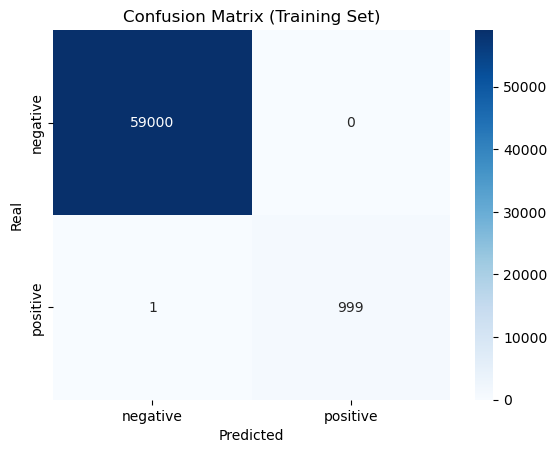

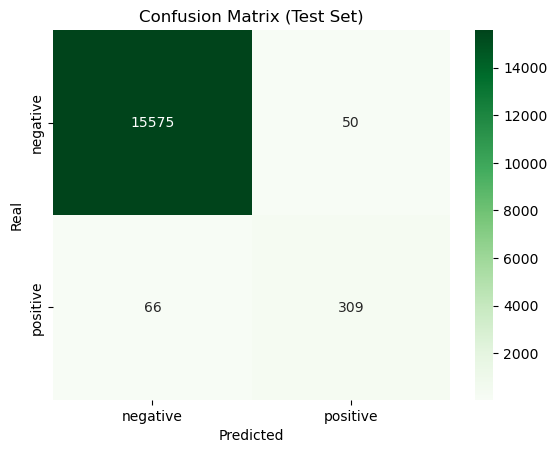

In [126]:
# Confusion Matrix for training set 
cm_tr = confusion_matrix(y_train, y_tr_pred)
sns.heatmap(cm_tr, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.title('Confusion Matrix (Training Set)')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

# Confusion Matrix for test set 
cm_te = confusion_matrix(y_test, y_te_pred)
sns.heatmap(cm_te, annot=True, fmt='d', cmap='Greens', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

/Users/hunnechen/anaconda3/envs/workspace/lib/python3.10/site-packages/sklearn/utils/_plotting.py:379: FutureWarning: `estimator_name` is deprecated in 1.7 and will be removed in 1.9. Use `name` instead.
  warnings.warn(


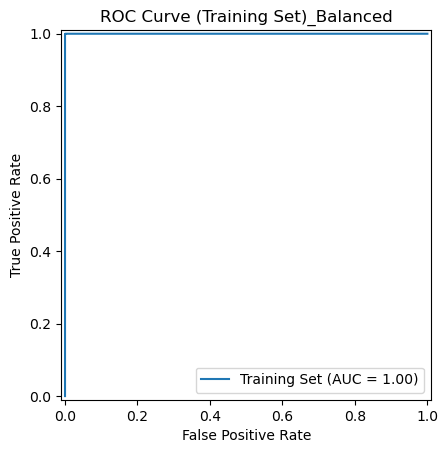

/Users/hunnechen/anaconda3/envs/workspace/lib/python3.10/site-packages/sklearn/utils/_plotting.py:379: FutureWarning: `estimator_name` is deprecated in 1.7 and will be removed in 1.9. Use `name` instead.
  warnings.warn(


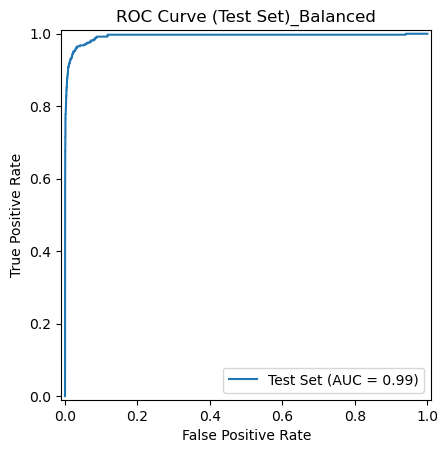

In [127]:
# ROC AUC for training set
y_tr_prob = pipe.predict_proba(X_train)[:, 1]
fpr_tr, tpr_tr, _ = roc_curve(y_train.replace({'neg': 0, 'pos': 1}), y_tr_prob)
roc_auc_tr = auc(fpr_tr, tpr_tr)
display_tr = RocCurveDisplay(fpr=fpr_tr, tpr=tpr_tr, roc_auc=roc_auc_tr, estimator_name='Training Set')
display_tr.plot()
plt.title('ROC Curve (Training Set)_Balanced')
plt.show()

# ROC AUC for testing set
y_te_prob = pipe.predict_proba(X_test)[:, 1]              
fpr_te, tpr_te, _ = roc_curve(y_test.replace({'neg': 0, 'pos': 1}), y_te_prob)
roc_auc_te = auc(fpr_te, tpr_te)
display_te = RocCurveDisplay(fpr=fpr_te, tpr=tpr_te, roc_auc=roc_auc_te, estimator_name='Test Set')
display_te.plot()
plt.title('ROC Curve (Test Set)_Balanced')
plt.show()

According to the test errors, the SMOTE compensatiing technique got the higher test error. The XGBoost with L1 penalized logistic regression at each node without compensating performs better.

## 2. ISLR 6.6.3

<br>(a) The iv. is correct for training RSS. As the s increasing from 0, the linear regression model will got more flexibility to fit the data. In this case, the training RSS will decreases since the model fit the data better
<br>(b) The ii. is correct for test RSS. The test error will decrease as the model flexibility increases. However, it will eventually increase after the model becomes too flexible and overfit the data.
<br>(c) The iii. is correct for variance. As the model becomes more flexible with the s increases, the model will become more sensitive to the differences in the training data. This will result in a higher variance in the model.
<br>(d) The iv. is correct for (squared) bias. As the model becomes more flexible with the s increases, the model will have a lower bias.
<br>(e) The v. is correct irreducible error. The irreducible error is the error that cannot be reduced by adjusting the model flexibility. It will remain constant regardless of the changes in the model flexibility.

## 3. ISLR 6.6.5

(a) The ridge regression optimization in this setting is to minimize the following objective function:
$$l(\beta_1, \beta_2) = (y_1 - \beta_1 x_{11} - \beta_2 x_{12}) ^2 + (y_2 - \beta_1 x_{21} - \beta_2 x_{22}) ^2 + \lambda ({\beta_1}^2+ {\beta_2}^2)$$

(b) Plug $x_{11} = x_{12}, x_{21} = x_{22}$ in the objective function and simplify the expression, we get:
$$l(\beta_1, \beta_2) = (y_1 - (\beta_1 +  \beta_2) x_{11}) ^2 + (y_2 - ( \beta_1 + \beta_2 ) x_{21} ) ^2 + \lambda ({\beta_1}^2+ {\beta_2}^2)$$
calculate the partial derivative of $l$ with respect to $\beta_1$ and $\beta_2$, we get:
$$\frac{\partial l}{\partial \beta_1} = -2 x_{11} (y_1 - (\beta_1 +  \beta_2) x_{11}) - 2 x_{21} (y_2 - ( \beta_1 + \beta_2 ) x_{21} ) + 2\lambda \beta_1$$
$$\frac{\partial l}{\partial \beta_2} = -2 x_{11} (y_1 - (\beta_1 +  \beta_2) x_{11}) - 2 x_{21} (y_2 - ( \beta_1 + \beta_2 ) x_{21} ) + 2\lambda \beta_2$$

set the partial derivatives to zero and subtract the two equations, we get:
$$2 \lambda (\hat \beta_1 - \hat \beta_2) = 0$$

therefore, $$\hat \beta_1 = \hat \beta_2$$


(c) The lasso regression optimization in this setting is to minimize the following objective function:
$$l(\beta_1, \beta_2) = (y_1 - \beta_1 x_{11} - \beta_2 x_{12}) ^2 + (y_2 - \beta_1 x_{21} - \beta_2 x_{22}) ^2 + \lambda (|\beta_1|+ |\beta_2|)$$

(d) Plug $x_{11} = x_{12}, x_{21} = x_{22}$ in the objective function and simplify the expression, we get:
$$l(\beta_1, \beta_2) = (y_1 - (\beta_1 +  \beta_2) x_{11}) ^2 + (y_2 - ( \beta_1 + \beta_2 ) x_{21} ) ^2 + \lambda (|\beta_1|+ |\beta_2|)$$

let s = $\beta_1 + \beta_2$, we get:
$$l(\beta_1, \beta_2) = (y_1 - s x_{11}) ^2 + (y_2 - s x_{21} ) ^2 + \lambda (|\beta_1|+ |\beta_2|)$$

because $$|\beta_1| + |\beta_2| \geq |\beta_1 + \beta_2| = |s|$$

when $\beta_1 + \beta_2 = \hat s$,and $\beta_1 \beta_2 \geq 0$, all the combinations of $\hat \beta_1$ and $\hat \beta_2$ are the optimal solution.
Therefore, the lasso cofficients are not unique.

## 4. ISLR 8.4.5

The predicted class if Red is the P(Class is Red|X) > 0.5, otherwise it is Green.

The predicted class for each estimated probability is:
- 0.1: Green
- 0.15: Green
- 0.2: Green
- 0.2: Green
- 0.55: Red
- 0.6: Red
- 0.6: Red
- 0.65: Red
- 0.7: Red
- 0.75: Red

The counts of class Red and Green are 6 and 4 respectively. Therefore, the final calssification is Red under majority voting.

As for the average probability:
$$P_{avg} = \frac{1}{10}\sum_{i=1}^{10}P_i = \frac{1}{10}(0.1+0.15+0.2+0.2+0.55+0.6+0.6+0.65+0.7+0.75) = 0.45$$
Therefore, the predicted class is Green.    

## 5. ISLR 9.7.3

(a) Sketch the observations

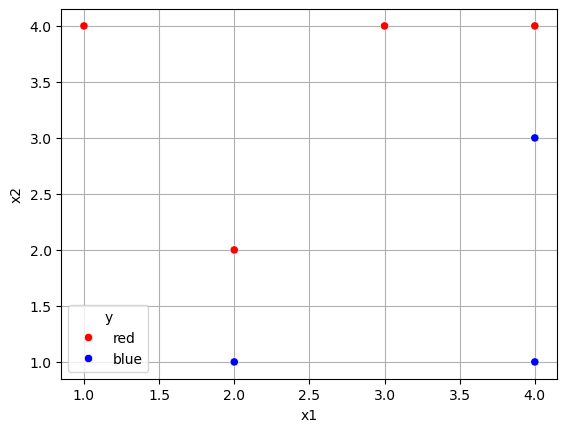

In [154]:
df = pd.DataFrame(
    {
        "x1": [3, 2, 4, 1, 2, 4, 4],
        "x2": [4, 2, 4, 4, 1, 3, 1],
        "y": ["red", "red", "red", "red", "blue", "blue", "blue"],
    }
)

sns.scatterplot(data=df, x="x1", y="x2", hue="y", palette={"red": "red", "blue": "blue"}, zorder=3)
plt.grid(zorder=0)
plt.show()

(b) The equation for the hyperplane is:
$$x_2 - x_1 + 0.5 = 0$$
sketch of the optimal hyperplane is shown below:

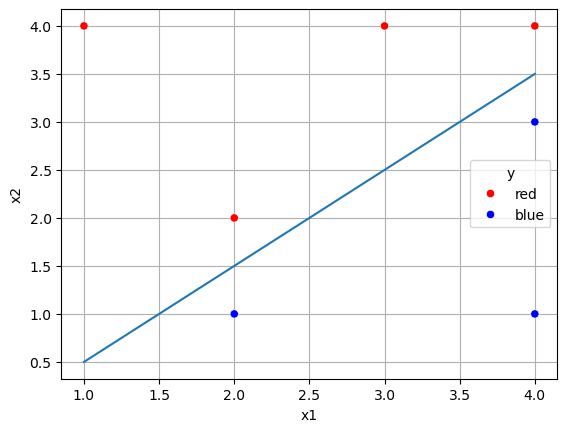

In [155]:
sns.scatterplot(data=df, x="x1", y="x2", hue="y", palette={"red": "red", "blue": "blue"}, zorder=3)
x = [1, 2, 3, 4]
y = [i - 0.5 for i in x] 
plt.plot(x, y, zorder=3)
plt.grid(zorder=0)
plt.show()

(c) The optimal separating hyperline in (b) cam be writtwn as:
$$f(x) = 0.5 - x_1 + x_2$$
The prameters for the maximal margin classifier are:
$$(\beta_0, \beta_1, \beta_2) = (0.5, -1, 1)$$
Therefore, an observation will be classified to Red if $f(x) = 0.5 - x_1 + x_2 > 0$, that is, $ x_2 > x_1 -0.5$, and be classified to Blue otherwise.         

(d) The margin for the maximal margin hyperplane is indicated in the sketch by the dotted lines.

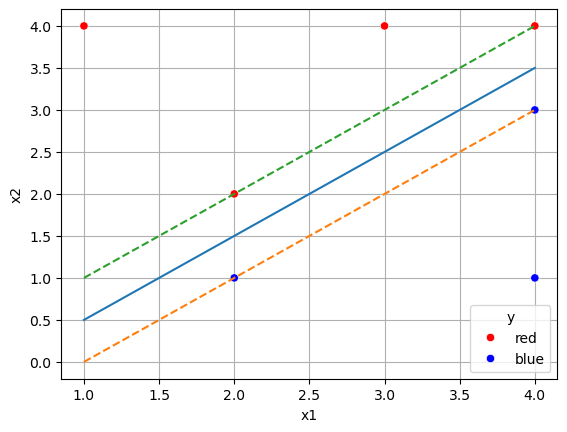

In [164]:
sns.scatterplot(data=df, x="x1", y="x2", hue="y", palette={"red": "red", "blue": "blue"}, zorder=3)
x = [1, 2, 3, 4]
y = [i - 0.5 for i in x] 
y1 = [i - 1 for i in x] 
y2 = [i for i in x] 
plt.plot(x, y, zorder=3)
plt.plot(x, y1, linestyle="--", zorder=3)
plt.plot(x, y2, linestyle="--", zorder=3)
plt.grid(zorder=0)
plt.show()

(e) The suppott vectors for the maximal margin classifier are: (2, 2), (4, 4), (2, 1), and (4, 3).

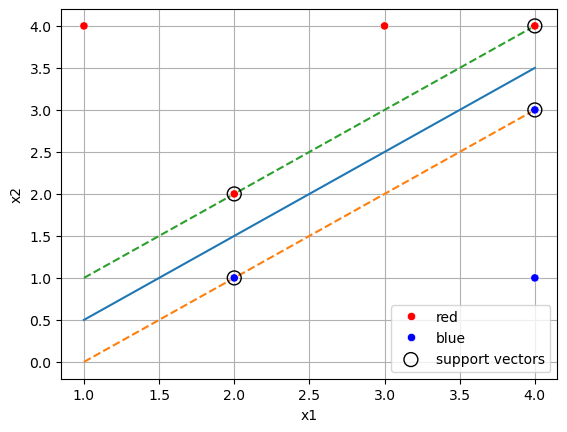

In [170]:
sns.scatterplot(data=df, x="x1", y="x2", hue="y", palette={"red": "red", "blue": "blue"}, zorder=5)
x = [1, 2, 3, 4]
y = [i - 0.5 for i in x] 
y1 = [i - 1 for i in x] 
y2 = [i for i in x] 
plt.plot(x, y, zorder=3)
plt.plot(x, y1, linestyle="--", zorder=3)
plt.plot(x, y2, linestyle="--", zorder=3)
sv = [(2, 2), (4, 4), (2, 1), (4, 3)]
xs, ys = zip(*sv)
plt.scatter(xs, ys, s=100, facecolor="none", edgecolor="black", label="support vectors", zorder=4)
plt.grid(zorder=0)
plt.legend()
plt.show()

(f) The seventh observation is not a support vector. Therefore, its slight movement will not affect the maximal margin hyperplane. However, the hyperplane will change if the seventh observation is moved into the margin region bounded by the two margin lines.

(g)$$f(x) = 0.3 - x_1 + x_2$$

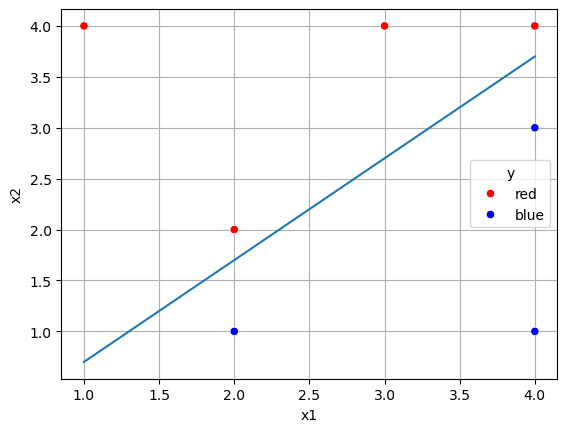

In [178]:
sns.scatterplot(data=df, x="x1", y="x2", hue="y", palette={"red": "red", "blue": "blue"}, zorder=3)
x = [1, 2, 3, 4]
y = [i - 0.3 for i in x] 
plt.plot(x, y, zorder=3)
plt.grid(zorder=0)
plt.show()

(h) The two class are no longer separable by a hyperplane after adding an observation (3, 1) with the red label.

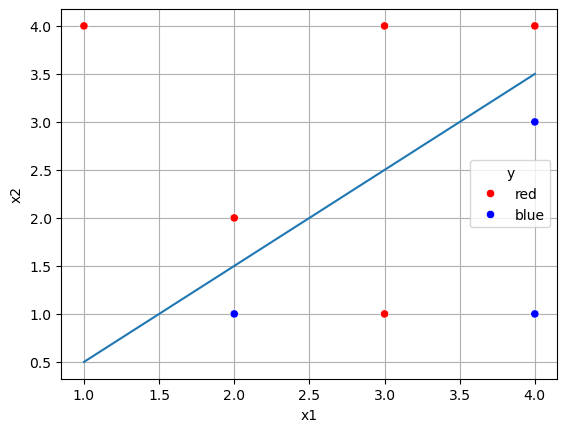

In [183]:
df_new = pd.DataFrame(
    {
        "x1": [3, 2, 4, 1, 2, 4, 4, 3],
        "x2": [4, 2, 4, 4, 1, 3, 1, 1],
        "y": ["red", "red", "red", "red", "blue", "blue", "blue", "red"],
    }
)

sns.scatterplot(data=df_new, x="x1", y="x2", hue="y", palette={"red": "red", "blue": "blue"}, zorder=3)
y = [i - 0.5 for i in x] 
plt.plot(x, y, zorder=3)
plt.grid(zorder=0)
plt.show()

### Reference
1. Data imputation techniques: https://medium.com/@tarangds/a-comprehensive-guide-to-data-imputation-techniques-strategies-and-best-practices-152a10fee543
2. How to handle imbalanced datasets in Random Forest: https://medium.com/sfu-cspmp/surviving-in-a-random-forest-with-imbalanced-datasets-b98b963d52eb
<br>https://statistics.berkeley.edu/sites/default/files/tech-reports/666.pdf
3. Random Forest Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
4. RocCurveDisplay: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html
5. XGBoost Classifier: https://xgboost.readthedocs.io/en/stable/python/python_api.html#module-xgboost.sklearn
6. SMOTE: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html
7. Imblearn.pipeline.Pipeline: https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html